In [3]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [31]:
def plot_history(h):
    plt.subplot(1,2,1)
    plt.title('Train Accuracy')
    plt.plot(h.history['accuracy'])
    plt.subplot(1,2,2)
    plt.title('Test Accuracy')
    plt.plot(h.history['val_accuracy'])
    plt.show()
    
    plt.title('comparision of train and test accuracy')
    
    plt.plot(h.history['accuracy'],label='train ')
    plt.plot(h.history['val_accuracy'],label='test')
    plt.legend()
    plt.show()
    
    plt.subplot(1,2,1)
    plt.title('Train Error')
    plt.plot(h.history['loss'])
    plt.subplot(1,2,2)
    plt.title('Test Error')
    plt.plot(h.history['val_loss'])
    plt.show()
    
    plt.title('comparision of train and test error')
    
    plt.plot(h.history['loss'],label='train ')
    plt.plot(h.history['val_loss'],label='test')
    plt.legend(loc='upper right')
    plt.show()
    
    

In [25]:


# path to json file that stores MFCCs and genre labels for each processed segment
DATA_PATH = "data.json"

def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y


if __name__ == "__main__":

    # load data
    X, y = load_data(DATA_PATH)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # build network topology
    model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

        # 1st dense layer
        keras.layers.Dense(512, activation='relu'),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu'),

        # 3rd dense layer
        keras.layers.Dense(64, activation='relu'),

        # output layer
        keras.layers.Dense(4, activation='softmax')
    ])

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)


Data succesfully loaded!
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1690)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               865792    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                                 
Total params: 1,013,828
Trainable params: 1,013,828
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
88/88 [

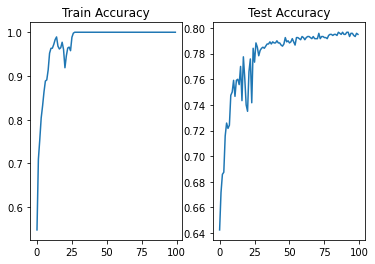

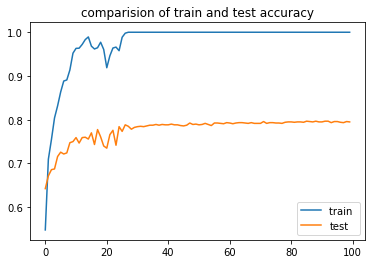

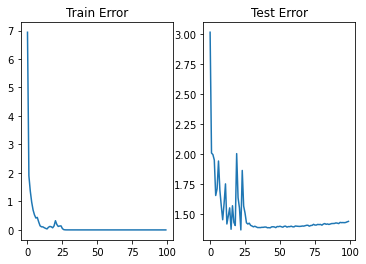

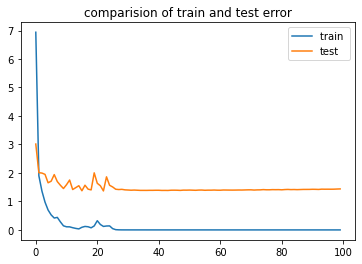

In [32]:
plot_history(history)

As this is causing overfitting prblem we will do use techniques to overcome it

In [36]:

# Using dropout and regularization to overcome overfitting 

    # build network topology
model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

        # 1st dense layer
        keras.layers.Dense(512, activation='relu',kernel_regularizer=keras.regularizers.L2(0.001)),
        keras.layers.Dropout(0.3),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu',kernel_regularizer=keras.regularizers.L2(0.001)),
        keras.layers.Dropout(0.3),
        
        # 3rd dense layer
        keras.layers.Dense(64, activation='relu',kernel_regularizer=keras.regularizers.L2(0.001)),
        keras.layers.Dropout(0.3),

        # output layer
        keras.layers.Dense(4, activation='softmax')
    ])

    # compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

    # train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 1690)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               865792    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)               

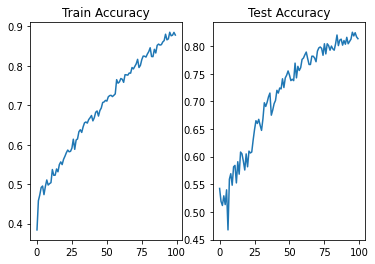

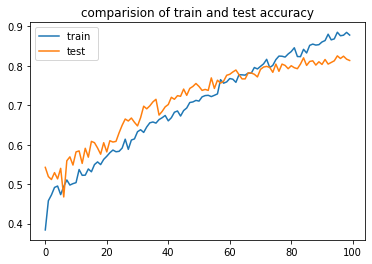

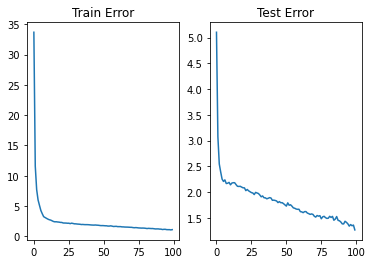

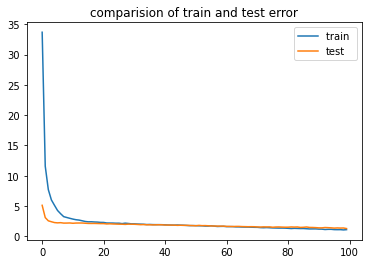

In [37]:
plot_history(history)

Now we can see there is improvemet in the difference between train and test accuracy, and also in train and test error . This shows that with use of dropout and L2 regularization we have considerably overcome overfitting problema and now our modal is more generalized .